# Objective



Analyze sales data to identify trends, relationships, and factors affecting sales performance


# Import Libraries

---







In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

---



In [113]:
from google.colab import files
uploaded = files.upload()

Saving superstore.csv to superstore (3).csv


In [116]:
df = pd.read_csv('/content/superstore.csv')

# Display the few rows

---



In [118]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [119]:
df.tail()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52
51289,Office Supplies,Los Angeles,United States,FH-143654,Fred Hopkins,0.2,US,1,2014-12-26 00:00:00.000,CA-2014-121398,...,154,Corporate,2014-12-30 00:00:00.000,Standard Class,9.59,California,Binders,2014,North America,52


# Basic information about the dataset

---



In [120]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales    

In [121]:
df.describe()


,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


In [122]:
df.rename(columns={"记录数":"Number of Records"}, inplace=True)

df["Number of Records"].head()

,Number of Records
0,1
1,1
2,1
3,1
4,1


# Statistical summary of numerical columns

---



In [123]:
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,Discount,Number of Records,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


# Check for duplicates

---



In [124]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


# Handle missing values

---



In [125]:
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

Missing values before cleaning:
Category             0
City                 0
Country              0
Customer.ID          0
Customer.Name        0
Discount             0
Market               0
Number of Records    0
Order.Date           0
Order.ID             0
Order.Priority       0
Product.ID           0
Product.Name         0
Profit               0
Quantity             0
Region               0
Row.ID               0
Sales                0
Segment              0
Ship.Date            0
Ship.Mode            0
Shipping.Cost        0
State                0
Sub.Category         0
Year                 0
Market2              0
weeknum              0
dtype: int64


# Convert 'Date' column to datetime format and verify

---



In [126]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

#  Create a new column for processing time

---



In [127]:
df['Processing.Time'] = (df['Ship.Date'] - df['Order.Date']).dt.days

# Plot time series graphs to observe trends in Sales over time.

---



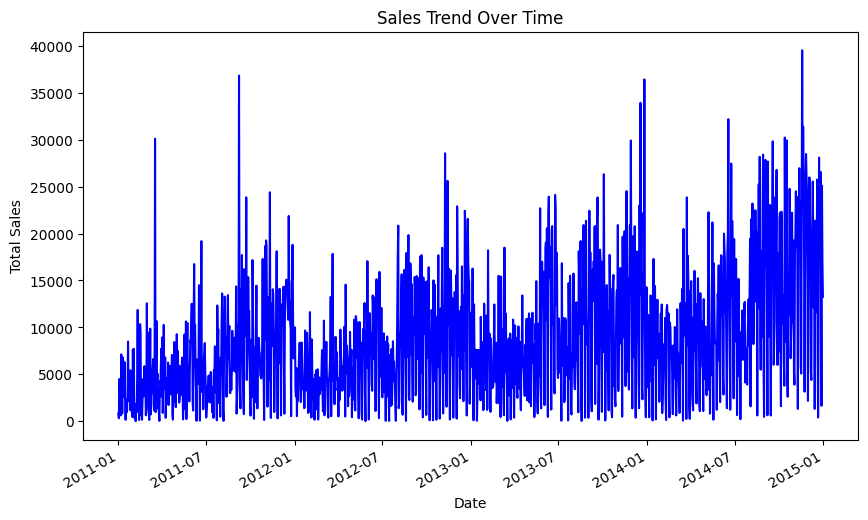

In [128]:
plt.figure(figsize=(10,6))
df.groupby('Order.Date')['Sales'].sum().plot(kind='line', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Use scatter plots to study the relationship between Profit and Discount

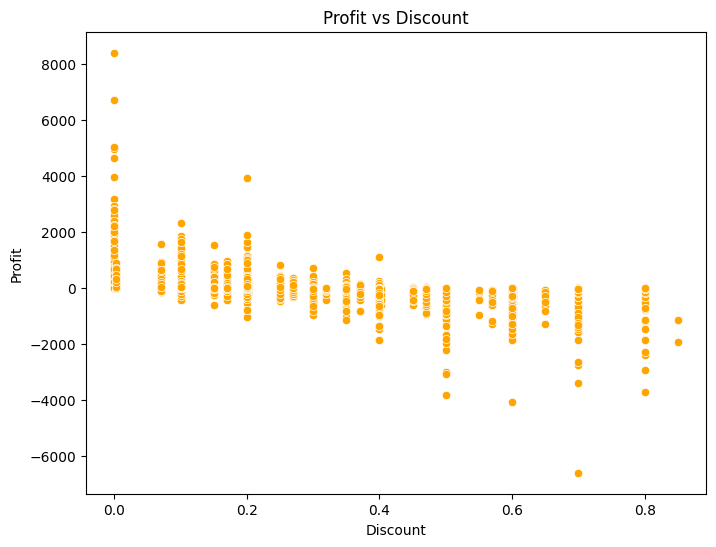

In [129]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Sales distribution by Region

---



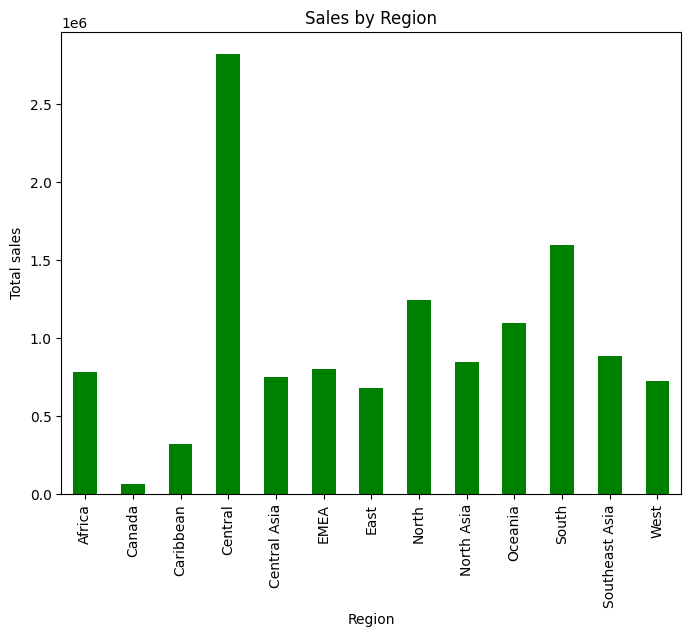

In [130]:
plt.figure(figsize=(8,6))
region_sales =  df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', color='green')
plt.title('Sales by Region')
plt.ylabel('Total sales')
plt.show()

# Heatmaps to visualize correlations and relationships between features

---



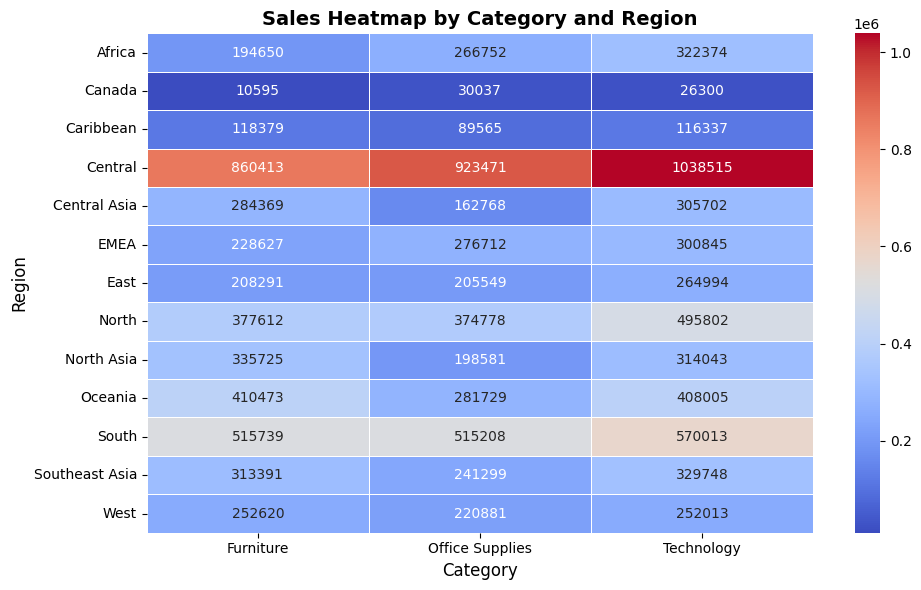

In [131]:
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Sales Heatmap by Category and Region", fontsize=14, weight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.tight_layout()
plt.show()

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select Features and Target

---



In [133]:
X = df[['Profit', 'Discount']]
Y = df['Sales']

# Split the dataset into trainting and test sets

---



In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Train the Linear Regression model

---



In [135]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Make Predictions

In [136]:
Y_pred = model.predict(X_test)

# Evaluate the model

---



In [137]:
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred):.2f}")
print(f"R-squared: {r2_score(Y_test, Y_pred):.2f}")

Mean Squared Error: 241642.62
R-squared: 0.11
